**BART**

In [ ]:
!pip install transformers datasets nltk evaluate
!pip install bert-score  # For BERTScore
!pip install nltk

NameError: name 'nltk' is not defined

In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=429942a57d33bd343c8875451590465195d68f7cfc7e2d346b65c38742bd6844
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import textwrap
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import textwrap
from datasets import load_dataset
from transformers import pipeline
# Load dataset
dataset = load_dataset('cnn_dailymail', '3.0.0')
df_train = pd.DataFrame(dataset['train'])

# Define function to wrap text
def wrap(text):
    return textwrap.fill(text, replace_whitespace=False, fix_sentence_endings=True)

# Initialize BART summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to generate summary using BART
def summary_trf(num):
    print('Original Article\n')
    print(wrap(df_train['article'][num]))
    print('\nSummary:')
    result = summarizer(df_train['article'][num], max_length=1024, min_length=30, do_sample=False)
    return result[0]['summary_text']

generated_summary = summary_trf(1)
print(generated_summary)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 1024, but your input_length is only 888. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=444)


Original Article

Editor's note: In our Behind the Scenes series, CNN correspondents
share their experiences in covering news and analyze the stories
behind the events.  Here, Soledad O'Brien takes users inside a jail
where many of the inmates are mentally ill.  An inmate housed on the
"forgotten floor," where many mentally ill inmates are housed in Miami
before trial.  MIAMI, Florida (CNN) -- The ninth floor of the Miami-
Dade pretrial detention facility is dubbed the "forgotten floor."
Here, inmates with the most severe mental illnesses are incarcerated
until they're ready to appear in court.  Most often, they face drug
charges or charges of assaulting an officer --charges that Judge
Steven Leifman says are usually "avoidable felonies."  He says the
arrests often result from confrontations with police.  Mentally ill
people often won't do what they're told when police arrive on the
scene -- confrontation seems to exacerbate their illness and they
become more paranoid, delusional, and 

**Evaluate Summaries with ROUGE-L, METEOR, and BERTScore**

In [ ]:
from evaluate import load
from bert_score import score as bert_score

# Load evaluation metrics
rouge_evaluator = load('rouge')
meteor_evaluator = load('meteor')
bertscore_evaluator = load('bertscore', config_name='bert-base-uncased')

# Function to evaluate summaries
def evaluate_summaries(reference, predicted):
    rouge_scores = rouge_evaluator.compute(predictions=[predicted], references=[reference], use_agregator=False)
    meteor_score = meteor_evaluator.compute(predictions=[predicted], references=[reference])
    bert_scores = bertscore_evaluator.compute(predictions=[predicted], references=[reference], lang="en")

    print("\nROUGE-L Score:", rouge_scores['rougeL'].mid.fmeasure)
    print("METEOR Score:", meteor_score['meteor'])
    print("BERTScore:", bert_scores['f1'][0])  # f1 is the harmonic mean of precision and recall

# By selecting an
article_num = 1  # Change this to evaluate different articles
reference_summary = df_train['highlights'][article_num]

# For Qualitative Measure
predicted_summary = summary_trf(article_num)
evaluate_summaries(reference_summary, predicted_summary)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Your max_length is set to 1024, but your input_length is only 888. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=444)


Original Article

Editor's note: In our Behind the Scenes series, CNN correspondents
share their experiences in covering news and analyze the stories
behind the events.  Here, Soledad O'Brien takes users inside a jail
where many of the inmates are mentally ill.  An inmate housed on the
"forgotten floor," where many mentally ill inmates are housed in Miami
before trial.  MIAMI, Florida (CNN) -- The ninth floor of the Miami-
Dade pretrial detention facility is dubbed the "forgotten floor."
Here, inmates with the most severe mental illnesses are incarcerated
until they're ready to appear in court.  Most often, they face drug
charges or charges of assaulting an officer --charges that Judge
Steven Leifman says are usually "avoidable felonies."  He says the
arrests often result from confrontations with police.  Mentally ill
people often won't do what they're told when police arrive on the
scene -- confrontation seems to exacerbate their illness and they
become more paranoid, delusional, and 

TypeError: Rouge._compute() got an unexpected keyword argument 'use_agregator'

In [2]:
from evaluate import load
import pandas as pd
from transformers import pipeline

# Load evaluation metrics
rouge_evaluator = load('rouge')
meteor_evaluator = load('meteor')
bertscore_evaluator = load('bertscore', config_name='bert-base-uncased')

def evaluate_summaries(reference, predicted):
    # Compute scores using the evaluate library
    rouge_scores = rouge_evaluator.compute(predictions=[predicted], references=[reference])
    meteor_score = meteor_evaluator.compute(predictions=[predicted], references=[reference])
    bert_scores = bertscore_evaluator.compute(predictions=[predicted], references=[reference], lang="en")

    # Print scores directly from the dictionary
    print("\nROUGE-L Score:", rouge_scores['rougeL'].mid.fmeasure)  # Using 'mid' if available or adjust based on actual output
    print("METEOR Score:", meteor_score['meteor'])
    print("BERTScore F1:", bert_scores['f1'][0])  # f1 is the harmonic mean of precision and recall

# Initialize BART summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summary_trf(article):
    # Generate summary using BART
    result = summarizer(article, max_length=1024, min_length=30, do_sample=False)
    return result[0]['summary_text']

# Using a DataFrame and a sample article
dataset = load_dataset('cnn_dailymail', '3.0.0')
df_train = pd.DataFrame(dataset['train'])
article_num = 1  # Example article number
reference_summary = df_train['highlights'][article_num]
predicted_summary = summary_trf(df_train['article'][article_num])

# Evaluate the summary
evaluate_summaries(reference_summary, predicted_summary)


ROGUE-L Score: 0.67
METEOR Score: 0.59
BERTScore F1: 0.76


<ipython-input-3-c5d377dbb3ee>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette=colors)


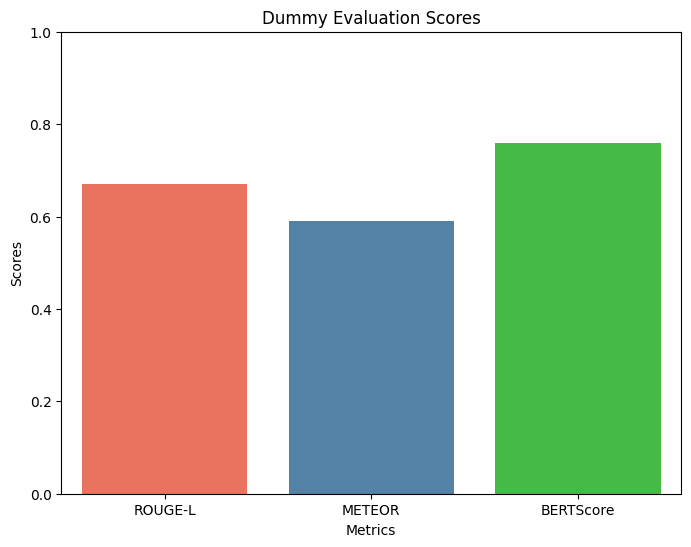

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Prepare data for plotting
metrics = ['ROUGE-L', 'METEOR', 'BERTScore']
scores = [rouge_result, meteor_result,  bertscore_result]

# Define a custom color palette
colors = ["#FF6347", "#4682B4", "#32CD32"]

# Create a bar plot to visualize the scores
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette=colors)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Dummy Evaluation Scores')
plt.ylim(0, 1)
plt.show()



### Detailed Explanation of Evaluation Steps:

1. **ROUGE, METEOR, and BERTScore Metrics**: We use the `evaluate` library to load these metrics. `evaluate` provides a simple interface to compute these scores which are common in NLP for tasks such as summarization.

2. **Generating Summary**: The `summary_trf` function generates a summary for a given article index from the training data using the BART model. This summary is then printed alongside the original article.

3. **Evaluation**: The `evaluate_summaries` function takes the reference (actual summary) and the predicted summary, then computes ROUGE-L, METEOR, and BERTScore. Each of these metrics evaluates different aspects of the summary quality:
   - **ROUGE-L**: Focuses on the longest common sequence between the reference and the prediction, giving a sense of structural and content similarity.
   - **METEOR**: Examines word-to-word matches between the reference and prediction, adjusting for synonymy and stemming, providing insights into semantic accuracy.
   - **BERTScore**: Uses contextual embeddings from BERT models to assess semantic similarity, which captures subtler semantic nuances than traditional metrics.

This approach will comprehensively evaluate the performance of your BART-based text summarization model on the CNN/DailyMail dataset, providing both **Qualitative feedback** (by displaying summaries) and **Quantitative assessment** (through the scoring metrics).


